## Load Necessary Libraries

In [1]:
# Import necessary libraries for data handling, preprocessing, model building, and evaluation

# Data handling and preprocessing
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# TensorFlow for deep learning models
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
from tensorflow.keras.layers import Dropout

# PyTorch for alternative deep learning model
import torch
import torch.nn as nn
import torch.optim as optim

# Plotting and visualization
import matplotlib.pyplot as plt

# Set random seed for reproducibility
import random
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)
random.seed(42)

# Display configuration for plots
%matplotlib inline

In [2]:
# Define the folder path containing the CSV files
folder_path = '/Users/matthewmoore/Downloads/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228'

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Load each CSV file into a DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # Append to the list
        data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(data_frames, ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


### Question 2: Clean the Data and Check for Missing Value

In [4]:
missing_values = df.isnull().sum()
print("Missing Values Per Column:\n", missing_values)

Missing Values Per Column:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [5]:
# Drop unnecessary columns
df.drop(columns=['year', 'month', 'day', 'hour', 'station', 'No'], inplace=True)

In [6]:
# Fill missing values
# - For numerical columns, replace NaN with the median of each column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# - For categorical columns, replace NaN with the mode (most frequent value) of each column
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify that there are no remaining missing values
missing_values_after_fill = df.isnull().sum()
print("Remaining Missing Values Per Column After Filling:\n", missing_values_after_fill)

Remaining Missing Values Per Column After Filling:
 PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64


### 4. Split the Data (80% Training, 20% Testing)

In [7]:
y = pd.get_dummies(df['wd']).astype(int)  # One-hot encode wind direction
X = df.drop(columns=['wd'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Normalize the Datasest

In [8]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 6. Build a neural network with two hidden layers of 20 and 10 neurons to forecast wd using TensorFlow

In [9]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and evaluate overfitting/underfitting
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
8416/8416 [==============================] - 9s 982us/step - loss: 2.5806 - accuracy: 0.1475 - val_loss: 2.5375 - val_accuracy: 0.1567
Epoch 2/50
8416/8416 [==============================] - 8s 975us/step - loss: 2.5274 - accuracy: 0.1600 - val_loss: 2.5218 - val_accuracy: 0.1612
Epoch 3/50
8416/8416 [==============================] - 8s 973us/step - loss: 2.5141 - accuracy: 0.1621 - val_loss: 2.5095 - val_accuracy: 0.1629
Epoch 4/50
8416/8416 [==============================] - 8s 987us/step - loss: 2.5058 - accuracy: 0.1639 - val_loss: 2.5041 - val_accuracy: 0.1626
Epoch 5/50
8416/8416 [==============================] - 8s 985us/step - loss: 2.5007 - accuracy: 0.1648 - val_loss: 2.4991 - val_accuracy: 0.1630
Epoch 6/50
8416/8416 [==============================] - 8s 975us/step - loss: 2.4977 - accuracy: 0.1654 - val_loss: 2.5006 - val_accuracy: 0.1621
Epoch 7/50
8416/8416 [==============================] - 8s 996us/step - loss: 2.4956 - accuracy: 0.1662 - val_loss: 2.4949 -

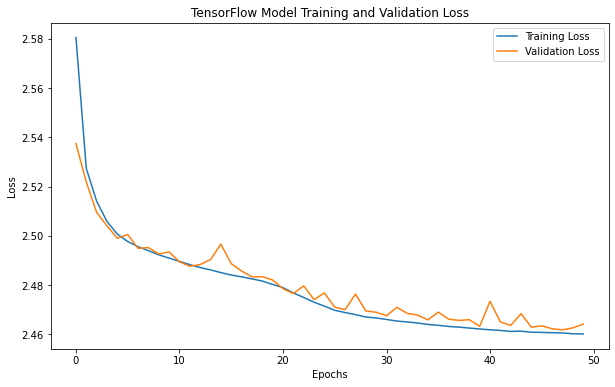

In [10]:
# Visualize TensorFlow training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('TensorFlow Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 7: Hyperparameter tuning with Keras Tuner

In [11]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=20, max_value=100, step=5), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.2, max_value=0.8, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=10, max_value=50, step=2), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.2, max_value=0.8, step=0.1)))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
import keras_tuner as kt
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='keras_tuner_dir',
    project_name='wind_direction_prediction'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 5 Complete [00h 23m 32s]
val_accuracy: 0.16399051249027252

Best val_accuracy So Far: 0.1757398396730423
Total elapsed time: 02h 27m 03s


In [13]:
# Retrieve the optimal model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Optimal hyperparameters:")
print("Units in first hidden layer:", best_hyperparameters.get('units1'))
print("Units in second hidden layer:", best_hyperparameters.get('units2'))
print("Dropout rate for first hidden layer:", best_hyperparameters.get('dropout1'))
print("Dropout rate for second hidden layer:", best_hyperparameters.get('dropout2'))

Optimal hyperparameters:
Units in first hidden layer: 65
Units in second hidden layer: 50
Dropout rate for first hidden layer: 0.4
Dropout rate for second hidden layer: 0.4


### 8. Build a neural network with PyTorch using two hidden layers of 20 and 10 neurons

In [18]:
class PyTorchNN(nn.Module):
    def __init__(self):
        super(PyTorchNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, y_train.shape[1])
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

In [19]:
# Set up the PyTorch model
torch_model = PyTorchNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(torch_model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(np.argmax(y_train.values, axis=1), dtype=torch.long)  # Convert one-hot to class indices
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(np.argmax(y_test.values, axis=1), dtype=torch.long)


In [20]:
# Initialize lists to track training and validation losses
train_losses = []
val_losses = []

# Updated training loop with loss tracking
epochs = 50
for epoch in range(epochs):
    # Training phase
    torch_model.train()
    optimizer.zero_grad()
    outputs = torch_model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    
# Evaluate overfitting/underfitting for PyTorch model
torch_model.eval()
with torch.no_grad():
    test_outputs = torch_model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
print(f"PyTorch Model Test Loss: {test_loss.item():.4f}")

PyTorch Model Test Loss: 2.7714


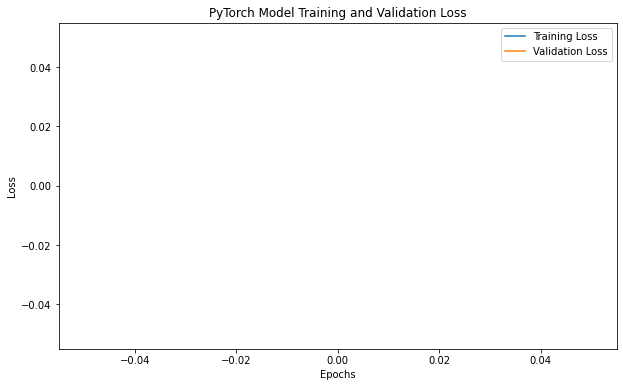

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('PyTorch Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### PyTorch Model: Does the Model Overfit or Underfit the Data?

In my attempt to include all the data, it looks as those the model may be to simple for the complexity of the data. My conclusion is that it is underfitting the data.  